<a href="https://colab.research.google.com/github/MarioAvolio/proj-data-an/blob/main/Transformers_Amazon_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt # plotting
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
PATH_PROJ = "/content/drive/MyDrive/data-proj/"
# if not os.path.exists(PATH_PROJ):
#   PATH_PROJ = "/content/drive/MyDrive/shared/data-proj/"

PATH_PREPROCESSED_DATASET = PATH_PROJ+"preprocessed.csv"

In [5]:
df = pd.read_csv(PATH_PREPROCESSED_DATASET)
df

,text,score
0,I have bought several of the Vitality canned d...,5.0
1,Product arrived labeled as Jumbo Salted Peanut...,1.0
2,This is a confection that has been around a fe...,4.0
3,If you are looking for the secret ingredient i...,2.0
4,Great taffy at a great price. There was a wid...,5.0
...,...,...
35167,"Once I tasted Hazelnut coffee, I was hooked! N...",5.0
35168,Has Maxwell House quit making this coffee? I ...,5.0
35169,"Nutty, smooth, subtle, with a WONDERFUL aroma-...",5.0
35170,Price was right and the taste very good. We w...,5.0


Transformers has a layered API that allows you to
interact with the library at various levels of abstraction. In this chapter we’ll start with
pipelines, which abstract away all the steps needed to convert raw text into a set of
predictions from a fine-tuned model.

In [6]:
!pip install transformers
from transformers import pipeline
classifier = pipeline("text-classification") 
# . By default, the text-classification pipeline uses a model
# that’s designed for sentiment analysis, but it also supports multiclass and multilabel classification.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.2 MB/s eta 0:00:00


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Now that we have our pipeline, let’s generate some predictions! Each pipeline takes a
string of text (or a list of strings) as input and returns a list of predictions. Each pre‐
diction is a Python dictionary, so we can use Pandas to display them nicely as a
DataFrame:

In [7]:
import pandas as pd
print(df.text.iloc[0])
outputs = classifier(df.text.iloc[0])
pd.DataFrame(outputs)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


,label,score
0,POSITIVE,0.998385


# From Text to Token

## Subword Tokenization

In [8]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [9]:
encoded_text = tokenizer(df.text.iloc[0])
print(encoded_text)

{'input_ids': [101, 1045, 2031, 4149, 2195, 1997, 1996, 8995, 3012, 27141, 3899, 2833, 3688, 1998, 2031, 2179, 2068, 2035, 2000, 2022, 1997, 2204, 3737, 1012, 1996, 4031, 3504, 2062, 2066, 1037, 20717, 2084, 1037, 13995, 6240, 1998, 2009, 14747, 2488, 1012, 2026, 18604, 2003, 10346, 6799, 2100, 1998, 2016, 9120, 2015, 2023, 4031, 2488, 2084, 2087, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


We can observe three things here. First, some special [CLS] and [SEP] tokens have
been added to the start and end of the sequence. These tokens differ from model to
model, but their main role is to indicate the start and end of a sequence. Second, the
tokens have each been lowercased, which is a feature of this particular checkpoint.

Finally, we can see that some words have been split into two tokens,
which makes sense since they are not common words. In particular The ## prefix means that the preceding string is not whitespace; any token with this prefix
should be merged with the previous token when you convert the tokens back to a
string. 

In [10]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'i', 'have', 'bought', 'several', 'of', 'the', 'vital', '##ity', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', '.', 'the', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', '.', 'my', 'labrador', 'is', 'fin', '##ick', '##y', 'and', 'she', 'appreciate', '##s', 'this', 'product', 'better', 'than', 'most', '.', '[SEP]']


In [11]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than most. [SEP]


The AutoTokenizer class also has several attributes that provide information about
the tokenizer. For example, we can inspect the vocabulary size:

In [18]:
tokenizer.vocab_size

30522

and the corresponding model’s maximum context size:


In [19]:
tokenizer.model_max_length

512

Another interesting attribute to know about is the names of the fields that the model
expects in its forward pass:

In [12]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

## Tokenizing the Whole Dataset
To tokenize the whole corpus, we’ll use the map() method of our DatasetDict object.

To get started, the first thing we need is a processing function to tokenize our examples with:

In [44]:
def tokenize(batch):
  '''
  This function applies the tokenizer to a batch of examples; padding=True will pad the
  examples with zeros to the size of the longest one in a batch, and truncation=True
  will truncate the examples to the model’s maximum context size.
  '''
  return tokenizer(batch["text"], padding=True, truncation=True)

In [45]:
!pip install datasets # https://github.com/huggingface/datasets

from datasets import Dataset

df_hugging = Dataset.from_pandas(df)
df_hugging

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Dataset({
    features: ['text', 'score'],
    num_rows: 35172
})

In [48]:
encoded_text = tokenize(df_hugging[:2])
encoded_text

{'input_ids': [[101, 1045, 2031, 4149, 2195, 1997, 1996, 8995, 3012, 27141, 3899, 2833, 3688, 1998, 2031, 2179, 2068, 2035, 2000, 2022, 1997, 2204, 3737, 1012, 1996, 4031, 3504, 2062, 2066, 1037, 20717, 2084, 1037, 13995, 6240, 1998, 2009, 14747, 2488, 1012, 2026, 18604, 2003, 10346, 6799, 2100, 1998, 2016, 9120, 2015, 2023, 4031, 2488, 2084, 2087, 1012, 102], [101, 4031, 3369, 12599, 2004, 18414, 13344, 5474, 2098, 27613, 1012, 1012, 1012, 1996, 27613, 2020, 2941, 2235, 7451, 4895, 12002, 3064, 1012, 2025, 2469, 2065, 2023, 2001, 2019, 7561, 2030, 2065, 1996, 21431, 3832, 2000, 5050, 1996, 4031, 2004, 1000, 18414, 13344, 1000, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

the first element of input_ids is longer than
the second, so zeros have been added to that element to make them the same length.
These zeros have a corresponding [PAD] token in the vocabulary, and the set of special tokens also includes the [CLS] and [SEP] tokens that we encountered earlier:

In [49]:
tokenizer.convert_ids_to_tokens(encoded_text.input_ids[1])

['[CLS]',
 'product',
 'arrived',
 'labeled',
 'as',
 'ju',
 '##mbo',
 'salt',
 '##ed',
 'peanuts',
 '.',
 '.',
 '.',
 'the',
 'peanuts',
 'were',
 'actually',
 'small',
 'sized',
 'un',
 '##sal',
 '##ted',
 '.',
 'not',
 'sure',
 'if',
 'this',
 'was',
 'an',
 'error',
 'or',
 'if',
 'the',
 'vendor',
 'intended',
 'to',
 'represent',
 'the',
 'product',
 'as',
 '"',
 'ju',
 '##mbo',
 '"',
 '.',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

Also note that in addition to returning the encoded tweets as input_ids, the tokenizer returns a list of attention_mask arrays. This is because we do not want the
model to get confused by the additional padding tokens: the attention mask allows
the model to ignore the padded parts of the input.

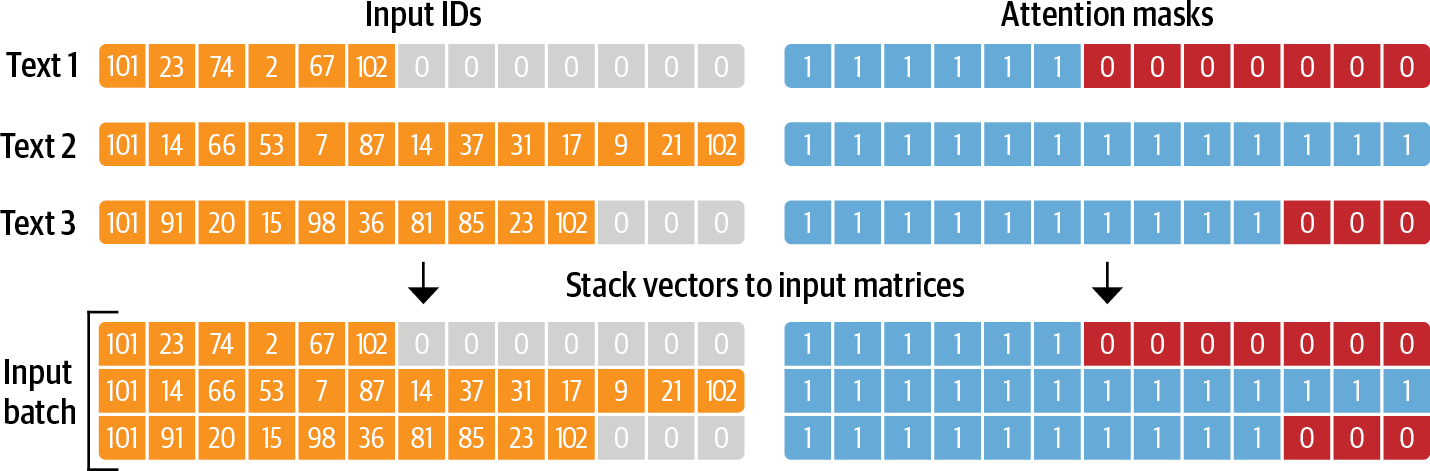

Once we’ve defined a processing function, we can apply it across all the splits in the
corpus in a single line of code:

In [50]:
text_encoded = df_hugging.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/35172 [00:00<?, ? examples/s]

By default, the map() method operates individually on every example in the corpus,
so setting batched=True will encode the tweets in batches. Because we’ve set
batch_size=None, our tokenize() function will be applied on the full dataset as a
single batch. This ensures that the input tensors and attention masks have the same
shape globally, and we can see that this operation has added new input_ids and
attention_mask columns to the dataset

In [55]:
text_encoded.column_names

['text', 'score', 'input_ids', 'attention_mask']

# Training a Text Classifier
First, the text is tokenized and represented as one-hot vectors called token encodings.
The size of the tokenizer vocabulary determines the dimension of the token encod‐
ings, and it usually consists of 20k–200k unique tokens. Next, these token encodings
are converted to token embeddings, which are vectors living in a lower-dimensional
space. The token embeddings are then passed through the encoder block layers to
yield a hidden state for each input token. For the pretraining objective of language
modeling, each hidden state is fed to a layer that predicts the masked input tokens.
For the classification task, we replace the language modeling layer with a classification layer

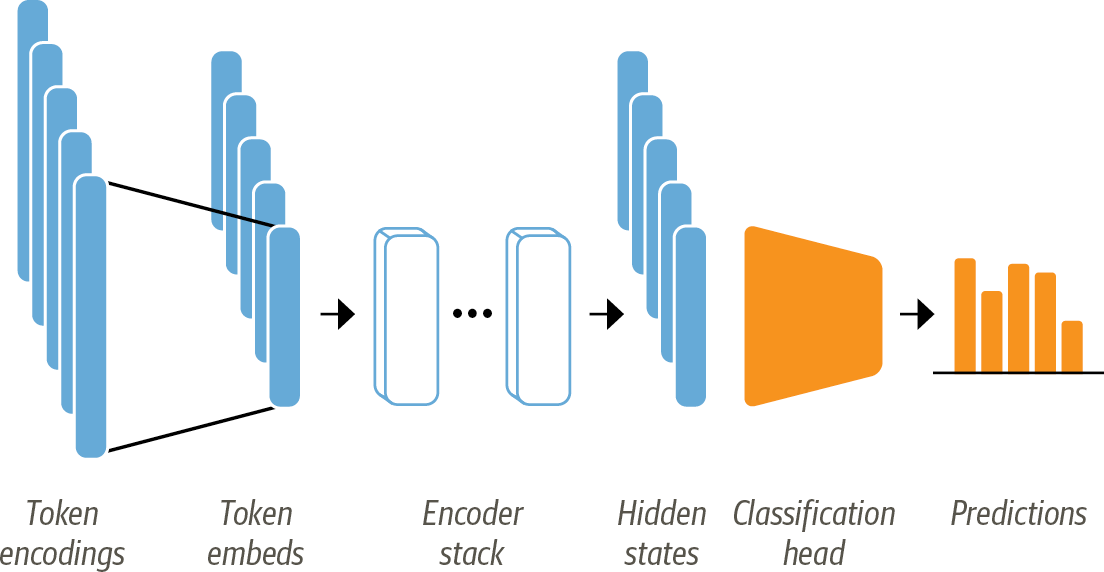